In [200]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [201]:
df=pd.read_csv('E:\Imarticus\Machine Learning/Unsupervised Learning/Hierarchical Clustering/Dataset/google_review_ratings.csv')

In [202]:
df

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


In [203]:
df.shape

(5456, 26)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [205]:
df.columns

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24', 'Unnamed: 25'],
      dtype='object')

In [206]:
df[df['Category 11'].str.isdigit()]

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
40,User 41,0.54,0.57,0.67,3.71,5.00,2.95,2.94,2.59,1.66,...,0.70,0.54,0.00,0.00,0.00,0.50,0.00,0.51,0.54,NaN
41,User 42,0.54,0.56,5.00,3.71,5.00,2.95,2.94,2.58,1.65,...,0.53,0.57,0.00,0.00,0.00,0.51,0.50,0.51,0.55,NaN
42,User 43,0.55,0.57,5.00,3.72,5.00,2.95,2.94,2.58,1.65,...,0.53,0.59,0.00,0.00,0.00,0.52,0.51,0.52,0.57,NaN
43,User 44,0.56,0.57,5.00,3.73,3.76,2.95,2.94,1.66,1.64,...,0.70,0.56,0.00,0.00,0.00,0.53,0.52,0.53,0.57,NaN
44,User 45,0.57,0.58,5.00,3.73,3.78,2.95,2.94,2.96,1.63,...,0.69,0.58,0.00,0.00,0.00,0.54,0.53,0.53,0.58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,User 5210,0.00,0.55,1.44,1.43,1.44,1.46,2.69,2.67,3.30,...,0.82,0.83,0.85,1.03,0.00,0.00,0.00,0.00,0.00,NaN
5210,User 5211,0.00,0.51,1.44,1.43,1.44,1.46,5.00,2.68,3.29,...,0.82,0.83,0.85,1.02,0.52,0.00,0.00,0.00,0.00,NaN
5240,User 5241,0.74,0.76,1.61,1.58,1.57,1.58,5.00,1.62,2.50,...,0.69,0.68,0.69,1.10,0.73,0.74,0.72,0.71,0.72,NaN
5272,User 5273,1.27,1.53,2.22,1.78,1.77,1.77,1.79,2.72,2.70,...,5.00,0.55,0.53,0.54,0.62,1.31,1.43,1.26,1.26,NaN


In [207]:
df["Category 11"].replace("2\t2.",np.nan,inplace=True)
df['Category 11']=df['Category 11'].astype('float64')

In [208]:
missing=[i for i in df.columns if df[i].isnull().sum()>0]
missing

['Category 11', 'Category 12', 'Category 24', 'Unnamed: 25']

In [209]:
df.drop('Unnamed: 25',axis=1,inplace=True)

In [210]:
df.dropna(inplace=True)

In [211]:
df

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [212]:
# cat_columns=list(df.select_dtypes(include='O'))
# cat_columns

In [213]:
# df.describe(include='O')

In [214]:
col=['User','churches','resorts','beaches','parks','theatres','museums','malls',
    'zoo','restaurants','pubs/bars','local services','burger/pizza shops','hotels/other lodgings',
    'juice bars','art galleries','dance clubs','swimming pools','gyms','bakeries',
    'beauty & spas','cafes','viewpoints','monuments','gardens']

In [215]:
df= df.set_axis(col, axis=1, inplace=False)

In [216]:
df.drop('User',axis=1,inplace=True)

In [217]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,viewpoints,monuments,gardens
0,0.0,0.000000,0.333580,0.335418,0.459476,0.268334,0.459476,0.215954,0.214116,0.242603,...,0.159898,0.054218,0.045948,0.0,0.045948,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.331487,0.333313,0.456593,0.266651,0.456593,0.241081,0.212773,0.241995,...,0.158895,0.053878,0.045659,0.0,0.045659,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.331762,0.331762,0.456972,0.266872,0.456972,0.241281,0.212949,0.241281,...,0.159026,0.053923,0.045697,0.0,0.045697,0.0,0.0,0.0,0.0,0.0
3,0.0,0.045907,0.333288,0.333288,0.459075,0.268100,0.459075,0.215765,0.213929,0.242391,...,0.159758,0.054171,0.045907,0.0,0.045907,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.331762,0.331762,0.456972,0.266872,0.456972,0.241281,0.212949,0.241281,...,0.159026,0.053923,0.045697,0.0,0.045697,0.0,0.0,0.0,0.0,0.0


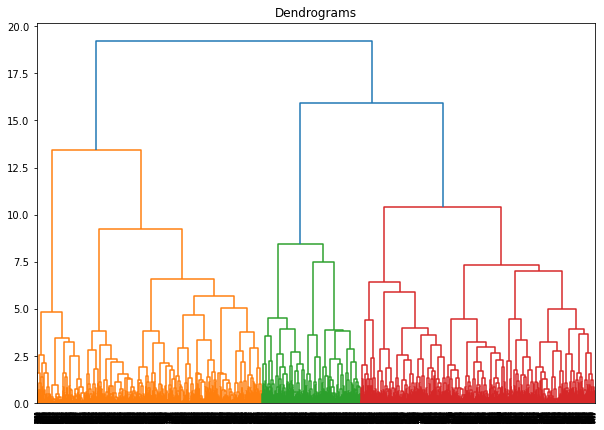

In [222]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

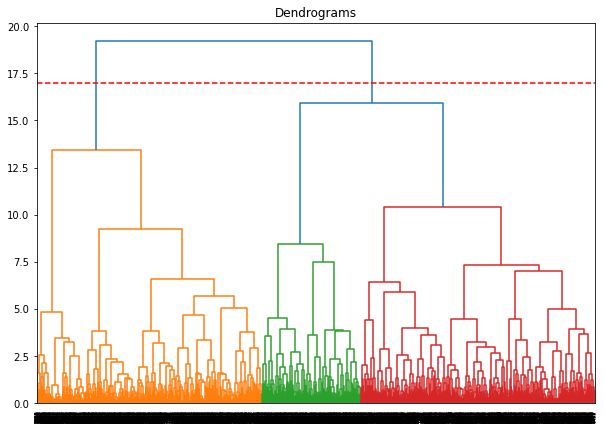

In [219]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=17, color='r', linestyle='--')

In [233]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

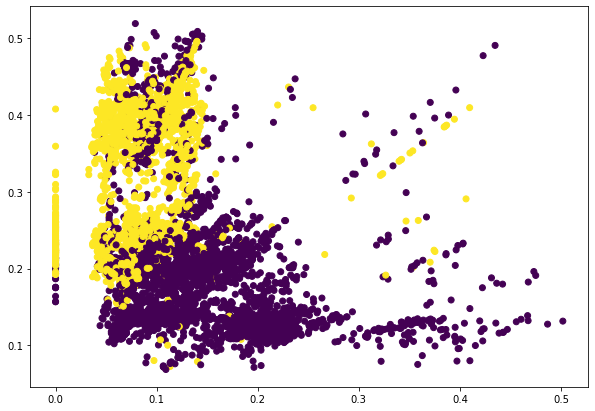

In [234]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['churches'], data_scaled['restaurants'], c=cluster.labels_) 

In [230]:
a=pd.DataFrame(cluster.labels_)

In [232]:
a.value_counts()

0    4461
1     993
dtype: int64